Often in computational chemistry when evaluating different methods we apply two methods to the same set of molecules.

The [Paired-Sample Student's T-test](https://en.wikipedia.org/wiki/Student%27s_t-test#Paired_samples) is one way to compare performance of two methods which uses the fact that both methods are applied to the same molecules to increase the statistical power of the analysis by removing the between-molecule variation.

Below is an example of working through a analysis.

**Caveats**

There are several assumptions inherent in the paired-sample T-test which may be problematic in computational chemistry, particularly the idea that the means of the samples are normally distributed and that the molecules represent an uncorrelated, independent sample. 

#### Loading Data

We'll use OENotebook to read some molecules into a [pandas](http://pandas.pydata.org/) DataFrame, then calculate some properties using the [OEChem](http://docs.eyesopen.com/toolkits/python/oechemtk/index.html) and [MolProp](http://docs.eyesopen.com/toolkits/python/molproptk/index.html) tooltkits.

<!-- fold -->

In [2]:
from __future__ import print_function

# import OE tools and data
import oenotebook as oenb
# oenb.capture_errors()

from openeye.oechem import OECalculateMolecularWeight, OECount, OEIsHeavy, OEIsCarbon
from openeye.oemolprop import OEGetXLogP


from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


import seaborn as sns
sns.set_context("poster")


,Molecule,MW,NumAtoms,NumCarbons
0,,225.244400,16,10
1,,305.276126,22,16
2,,324.333940,28,17
3,,294.261600,22,16
4,,356.415560,26,20

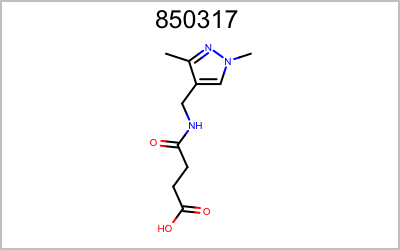
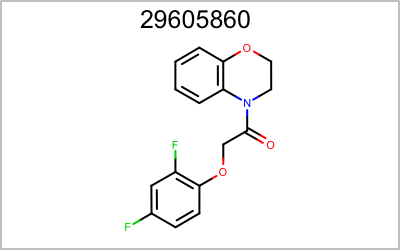
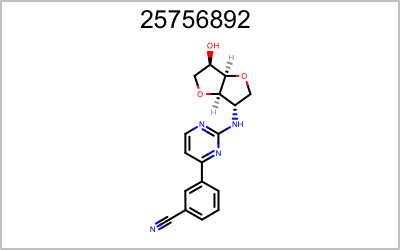
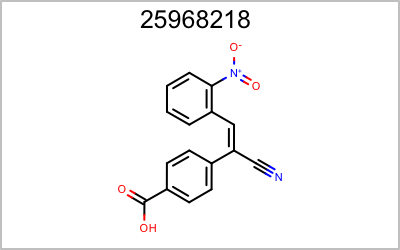
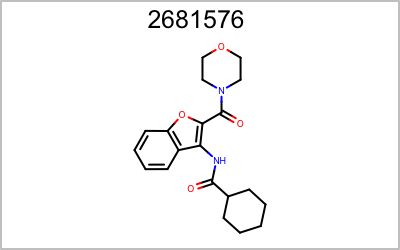

In [3]:
# Read in molecules and calculate some stuff
df = oenb.read_file_to_dataframe("./eMol_ran200.ism")
df["MW"] = df.Molecule.apply(OECalculateMolecularWeight)
df["NumAtoms"] = df.Molecule.apply(lambda x: x.NumAtoms())
df["NumCarbons"] = df.Molecule.apply(lambda x: OECount(x, OEIsCarbon()))

# df["NumBonds"] = df.Molecule.apply(lambda x: x.NumBonds())
# df["NumBonds"] = df.Molecule.apply(lambda x: x.NumBonds())

# df["XlogP"] = df.Molecule.apply(OEGetXLogP)

oenb.render_dataframe(df.head())

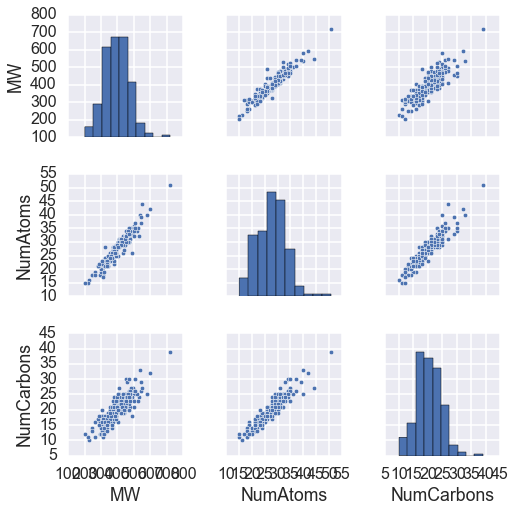

In [5]:
sns.pairplot(df[["MW","NumAtoms","NumCarbons"]])

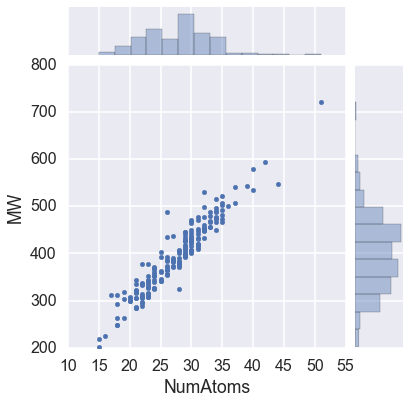

In [6]:
sns.jointplot(x="NumAtoms", y="MW", data=df, stat_func=None);

In [8]:
#sns.jointplot(x="XlogP", y="MW", data=df, stat_func=None);

In [9]:
from scipy.stats import linregress

In [10]:
natom_slope, natom_intercept = linregress(df["NumAtoms"],df["MW"])[:2]
ncarb_slope, ncarb_intercept = linregress(df["NumCarbons"],df["MW"])[:2]

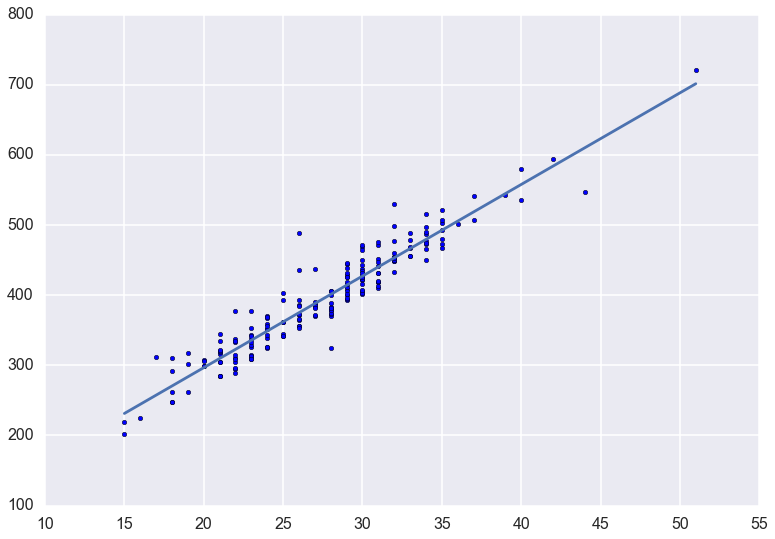

In [11]:
plt.scatter(df["NumAtoms"],df["MW"])
sup = np.linspace(df["NumAtoms"].min(), df["NumAtoms"].max())
plt.plot(sup,natom_slope*sup+natom_intercept)

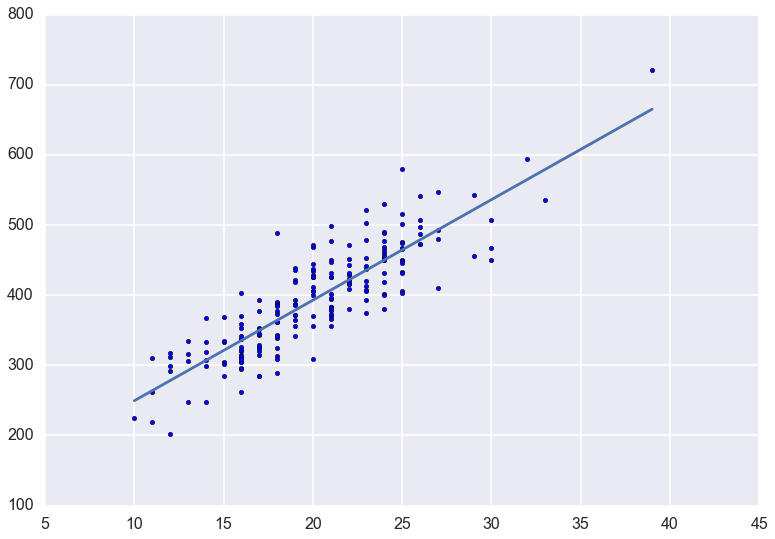

In [12]:
plt.scatter(df["NumCarbons"],df["MW"])
sup = np.linspace(df["NumCarbons"].min(), df["NumCarbons"].max())
plt.plot(sup,ncarb_slope*sup+ncarb_intercept)

,Molecule,MW,NumAtoms,NumCarbons
0,,338.529460,25,23
1,,425.310520,29,22
2,,289.716980,20,14
3,,376.519520,26,18
4,,419.421826,30,21

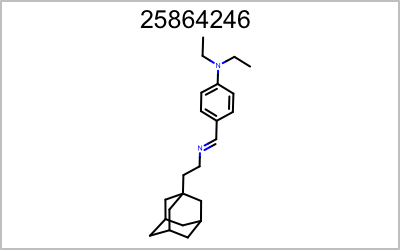
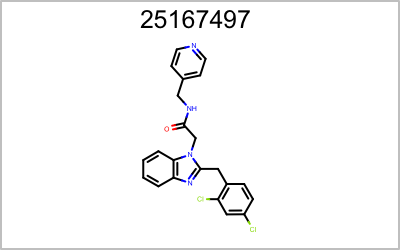
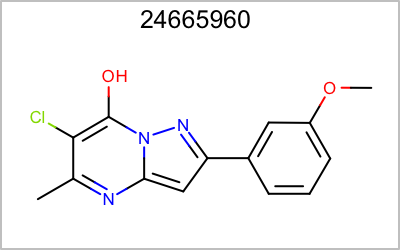
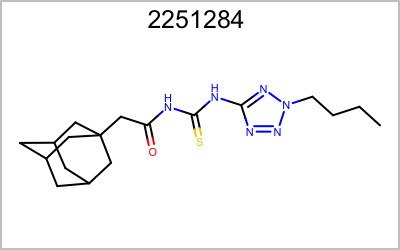
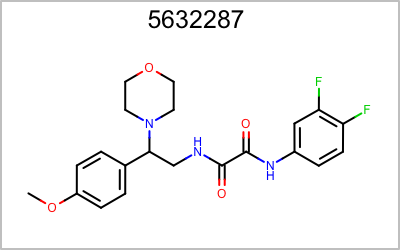

In [13]:
# Load New Molecules
nm = oenb.read_file_to_dataframe("./eMol_ran50.ism")
nm["MW"] = nm.Molecule.apply(OECalculateMolecularWeight)
nm["NumAtoms"] = nm.Molecule.apply(lambda x: x.NumAtoms())
# nm["NumBonds"] = nm.Molecule.apply(lambda x: x.NumBonds())
nm["NumCarbons"] = nm.Molecule.apply(lambda x: OECount(x, OEIsCarbon()))
# nm["XlogP"] = nm.Molecule.apply(OEGetXLogP)

oenb.render_dataframe(nm.head())

In [14]:
# Predict MW with our two models
nm["pMW_natom"] = nm["NumAtoms"]*natom_slope + natom_intercept
nm["pMW_ncarb"] = nm["NumCarbons"]*ncarb_slope + ncarb_intercept
# nm["pMW_xlogp"] = nm["XlogP"]*xlogp_slope + xlogp_intercept

In [15]:
nm.head()

,Molecule,MW,NumAtoms,NumCarbons,pMW_natom,pMW_ncarb
0,<oechem.OEMol; proxy of <Swig Object of type '...,338.529460,25,23,361.924971,435.818975
1,<oechem.OEMol; proxy of <Swig Object of type '...,425.310520,29,22,414.149897,421.487049
2,<oechem.OEMol; proxy of <Swig Object of type '...,289.716980,20,14,296.643813,306.831643
3,<oechem.OEMol; proxy of <Swig Object of type '...,376.519520,26,18,374.981202,364.159346
4,<oechem.OEMol; proxy of <Swig Object of type '...,419.421826,30,21,427.206129,407.155123


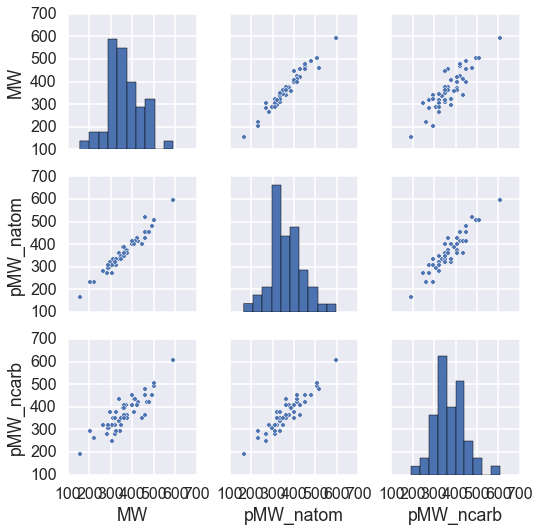

In [23]:
sns.pairplot(nm[["MW","pMW_natom","pMW_ncarb"]]);

In [16]:
nm["AbsErr_natom"] = np.abs(nm["pMW_natom"] - nm["MW"])
nm["AbsErr_ncarb"] = np.abs(nm["pMW_ncarb"] - nm["MW"])
# nm["pMW_xlogp_err"] = np.abs(nm["pMW_xlogp"] - nm["MW"])

/Users/dariabalatsky/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


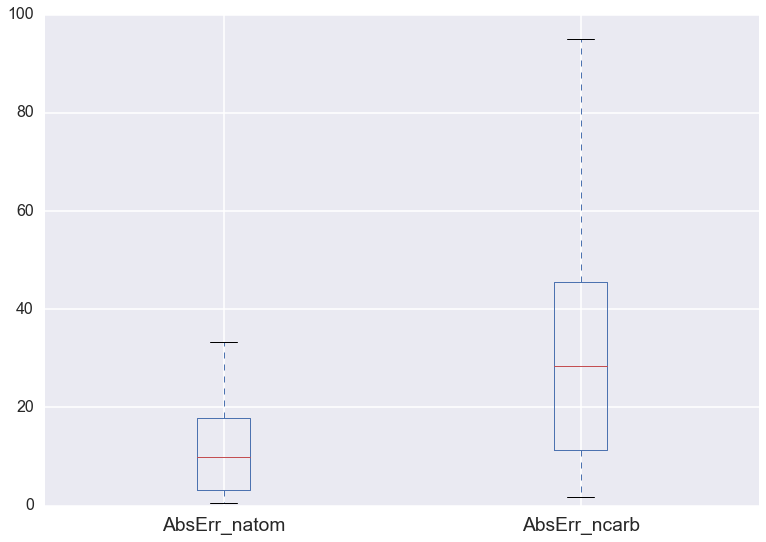

In [17]:
nm.boxplot(column=["AbsErr_natom", "AbsErr_ncarb"]);

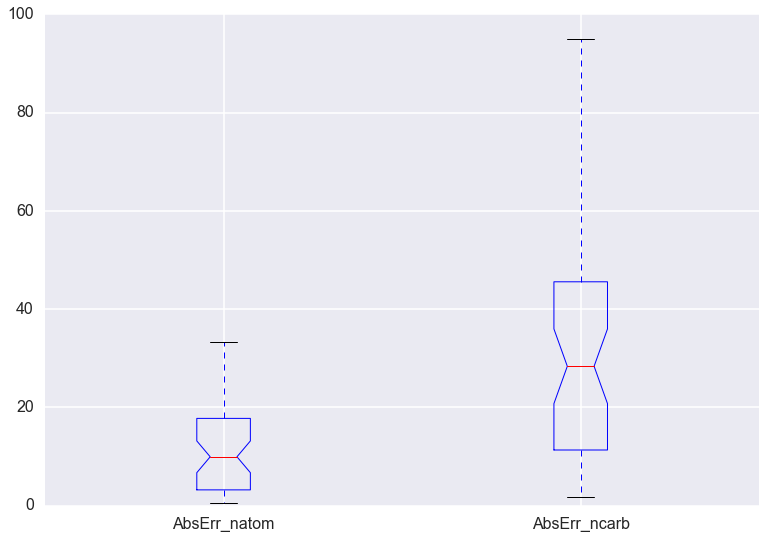

In [26]:
plt.boxplot(nm[["AbsErr_natom","AbsErr_ncarb"]].values,notch=True, labels=["AbsErr_natom","AbsErr_ncarb"]);

/Users/mattg/miniconda2/envs/oe/lib/python2.7/site-packages/seaborn/categorical.py:1613: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


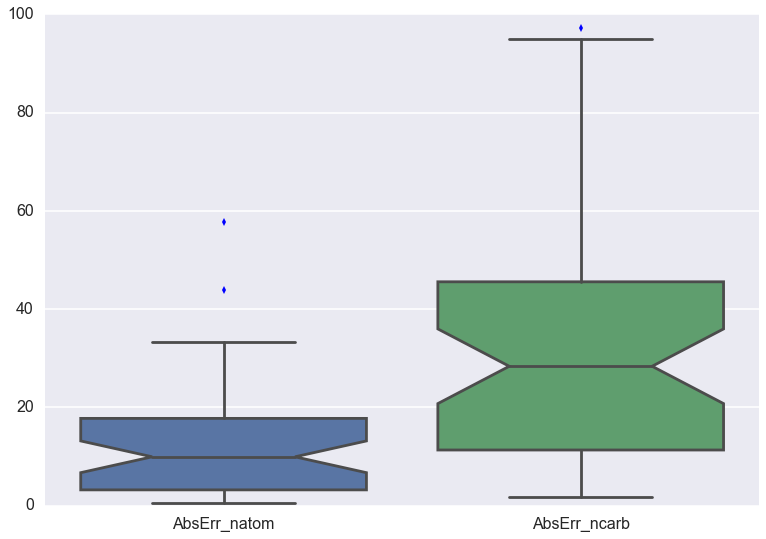

In [27]:
sns.boxplot(nm[["AbsErr_natom","AbsErr_ncarb"]],notch=True)

/Users/mattg/miniconda2/envs/oe/lib/python2.7/site-packages/seaborn/categorical.py:1791: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


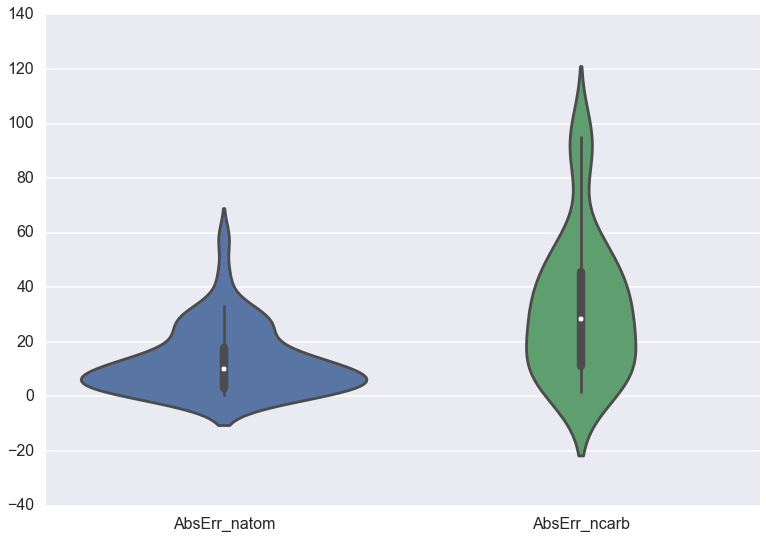

In [28]:
sns.violinplot(nm[["AbsErr_natom","AbsErr_ncarb"]])

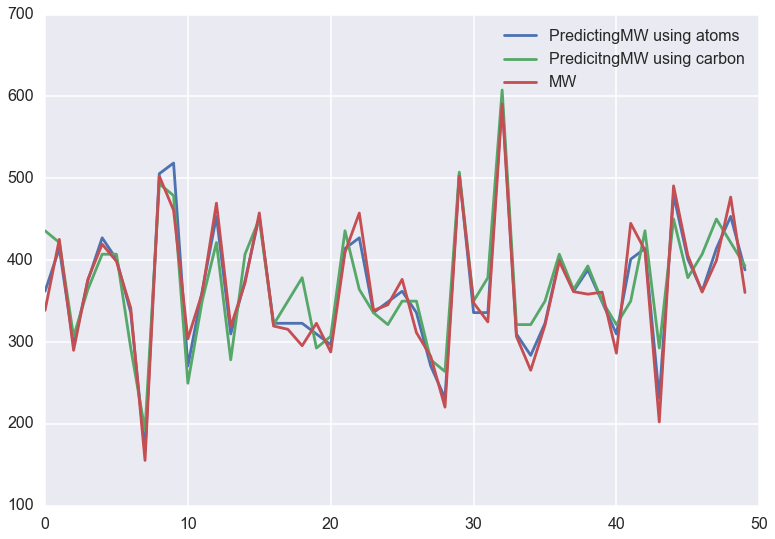

In [20]:
plt.plot(nm["pMW_natom"], label = "PredictingMW using atoms")
plt.plot(nm["pMW_ncarb"], label = "PredicitngMW using carbon")
plt.plot(nm["MW"], label = "MW")
plt.legend()

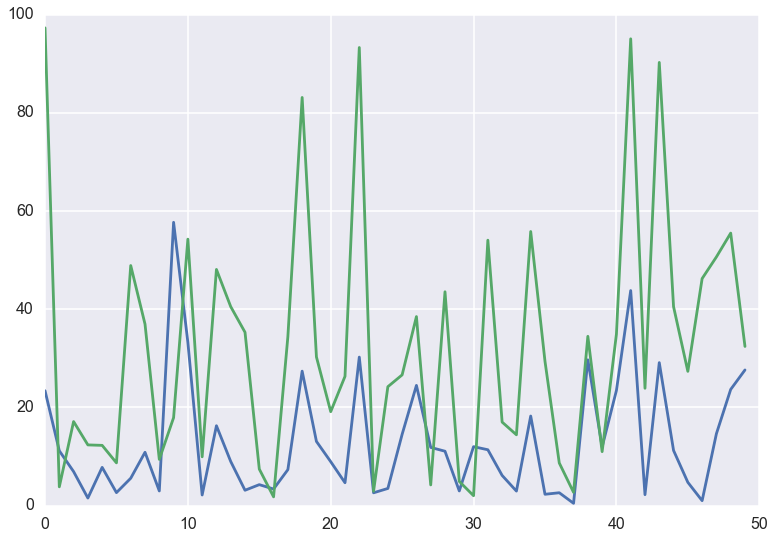

In [31]:
plt.plot(np.abs(nm["AbsErr_natom"]))
plt.plot(np.abs(nm["AbsErr_ncarb"]))

/Users/mattg/miniconda2/envs/oe/lib/python2.7/site-packages/numpy/lib/function_base.py:213: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/mattg/miniconda2/envs/oe/lib/python2.7/site-packages/numpy/lib/function_base.py:249: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


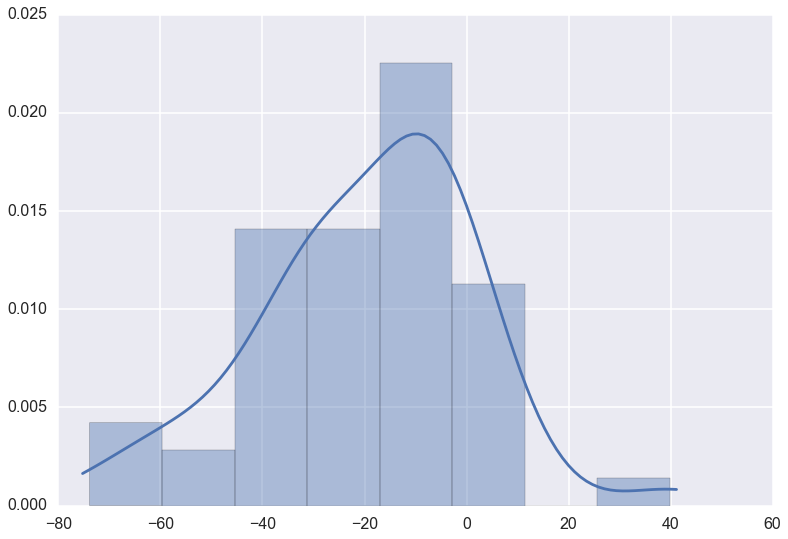

In [32]:
sns.distplot(np.abs(nm["AbsErr_natom"])-np.abs(nm["AbsErr_ncarb"]))

In [33]:
from scipy.stats import ttest_rel

In [34]:
ttest_rel(nm["AbsErr_natom"],nm["AbsErr_ncarb"])

Ttest_relResult(statistic=-6.4921192070986145, pvalue=4.062062085777911e-08)